In [3]:
import os

In [68]:
os.chdir('C:\\Users\\kandanulus\\MyTestlab\\DPL\\images\dataset')

In [69]:
pwd()

'C:\\Users\\kandanulus\\MyTestlab\\DPL\\images\\dataset'

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#MNIST Digit Classification

In [71]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [72]:
X_train.shape

(60000, 28, 28)

In [73]:
X_test.shape

(10000, 28, 28)

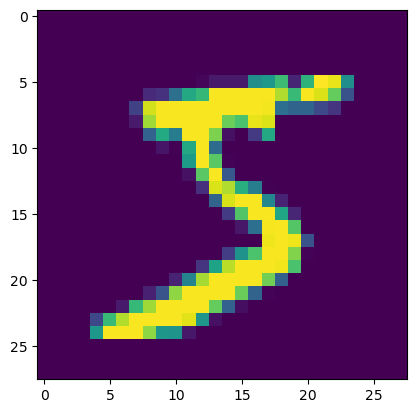

In [74]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

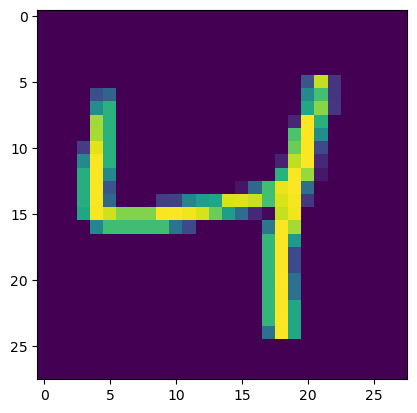

In [75]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [76]:
X_train[0].shape

(28, 28)

In [77]:
# Reshape the X_train & X_test - 60000,28,28,1
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)


In [78]:
X_train[0].shape

(28, 28, 1)

In [79]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [80]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [81]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [82]:
y_test = to_categorical(y_test)

# Categoriacal Cross entropy


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [84]:
# Build the model
model = Sequential()
# CNN - first layer
# CNN- first layer
model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# ANN Part
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 64)          51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 1000)             

In [86]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3832 - accuracy: 0.9445 - val_loss: 0.0683 - val_accuracy: 0.9807
Epoch 2/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0723 - accuracy: 0.9792 - val_loss: 0.0586 - val_accuracy: 0.9824
Epoch 3/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0579 - accuracy: 0.9828 - val_loss: 0.0536 - val_accuracy: 0.9851


In [88]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0536 - accuracy: 0.9851


[0.053571105003356934, 0.9850999712944031]

# Test set Cats Dogs

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [62]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [63]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.layers import Dropout

In [64]:
os.chdir('C:\\Users\\kandanulus\\MyTestlab\\DPL\\images\dataset')


In [65]:
pwd()

'C:\\Users\\kandanulus\\MyTestlab\\DPL\\images\\dataset'

In [66]:
os.chdir('C:\\Users\\kandanulus\\MyTestlab\\DPL\\images\dataset\\training\\cats')

NameError: name 'imgread' is not defined

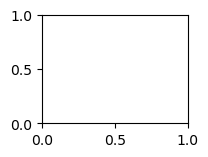

In [67]:
for i in range(9):
  plt.subplot(330+1+i)
  filename= r'C:\\Users\\kandanulus\\MyTestlab\\DPL\\images\\dataset\\training\\cats\\'+'cat.'+str(i+1)+'.jpg'''
  image=imgread(filename)
  plt.imshow(image)
plt.show()

NameError: name 'imread' is not defined

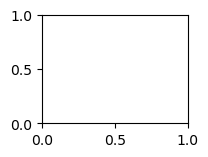

In [33]:
for i in range(9):
  plt.subplot(330+1+i)
  filename= r'C:\\Users\\kandanulus\\MyTestlab\\DPL\\images\\dataset\\training\\dogs\\'+'dog.'+str(i+1)+'.jpg'''
  image=imread(filename)
  plt.imshow(image)
plt.show()

# Data Augmentation

In [49]:
# generate new images with rotation, transform, angles,zoom, flip
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

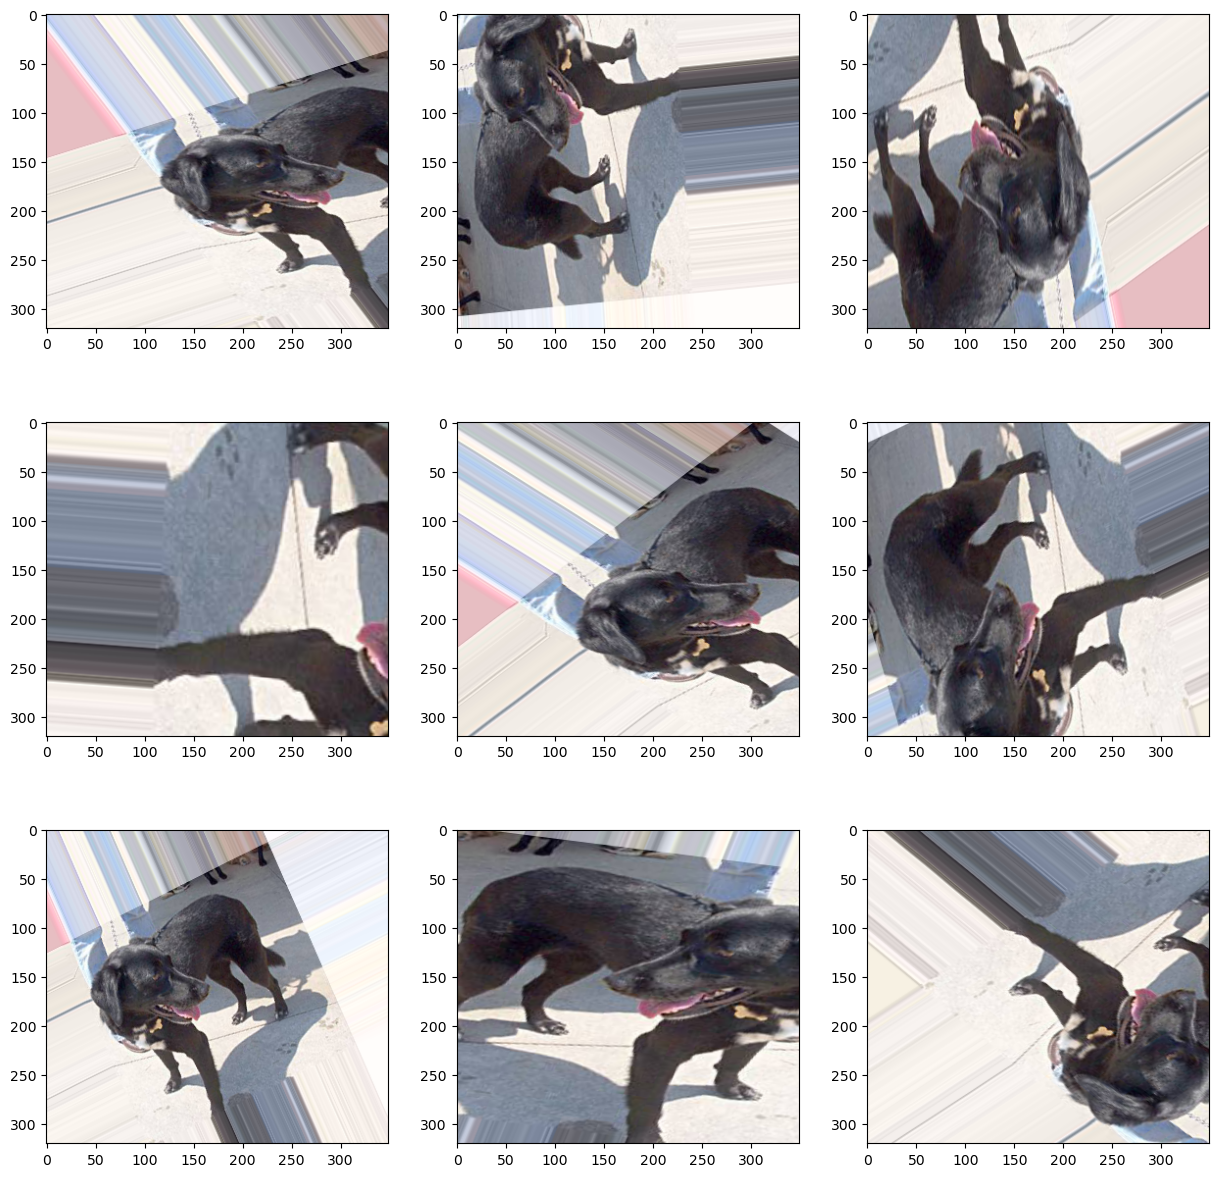

In [53]:
plt.figure(figsize=(15,15))
# load the image
img = load_img(r'C:\\Users\\kandanulus\\MyTestlab\\DPL\\images\\dataset\\training\\dogs\\dog.400.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(shear_range = 0.2,
                                   zoom_range = 0.5,
                                   horizontal_flip = True,vertical_flip=True,rotation_range=90,height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [54]:
training_set=train_datagen.flow_from_directory('C:\\Users\\kandanulus\\MyTestlab\\DPL\\images\\dataset\\training\\',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary'
                                               )

Found 8000 images belonging to 2 classes.


In [55]:
test_set=test_datagen.flow_from_directory('C:\\Users\\kandanulus\\MyTestlab\\DPL\\images\\dataset\\test\\',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary'
                                               )

Found 2000 images belonging to 2 classes.


In [56]:
test_set=test_datagen.flow_from_directory('C:\\Users\\kandanulus\\MyTestlab\\DPL\\images\\dataset\\test\\',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary'
                                               )

Found 2000 images belonging to 2 classes.


In [57]:
# CNN Architecture
model=Sequential()
# First CNN Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Second CNN Layer
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# ANN
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
# Output Layer
model.add(Dense(1,activation='sigmoid'))

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)       

In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
history=model.fit(training_set,validation_data=test_set,epochs=10)

Epoch 1/10
250/250 [==============================] - 42s 165ms/step - loss: 0.6927 - accuracy: 0.5307 - val_loss: 0.6651 - val_accuracy: 0.6155
Epoch 2/10
250/250 [==============================] - 32s 127ms/step - loss: 0.6531 - accuracy: 0.6171 - val_loss: 0.5938 - val_accuracy: 0.7020
Epoch 3/10
250/250 [==============================] - 32s 126ms/step - loss: 0.6139 - accuracy: 0.6622 - val_loss: 0.6143 - val_accuracy: 0.6680
Epoch 4/10
250/250 [==============================] - 32s 127ms/step - loss: 0.5901 - accuracy: 0.6860 - val_loss: 0.5550 - val_accuracy: 0.7160
Epoch 5/10
250/250 [==============================] - 32s 127ms/step - loss: 0.5678 - accuracy: 0.7028 - val_loss: 0.5610 - val_accuracy: 0.7180
Epoch 6/10
250/250 [==============================] - 32s 127ms/step - loss: 0.5517 - accuracy: 0.7178 - val_loss: 0.5569 - val_accuracy: 0.7245
Epoch 7/10
250/250 [==============================] - 32s 127ms/step - loss: 0.5351 - accuracy: 0.7295 - val_loss: 0.5247 - val_ac

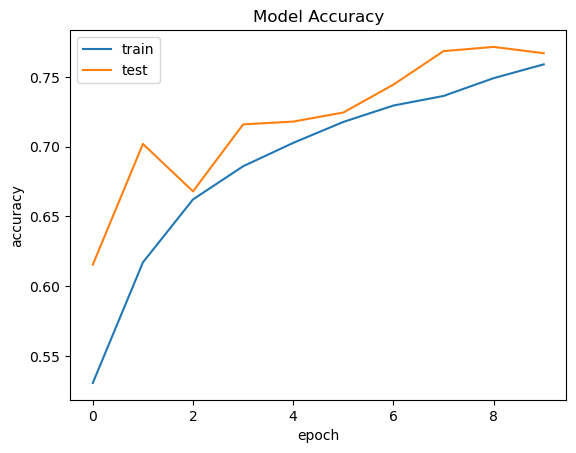

In [66]:
# Plot the accuracy & loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='best')
plt.show()

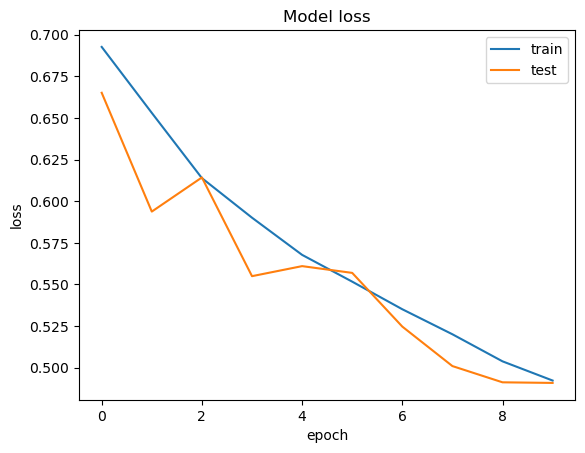

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='best')
plt.show()

In [68]:
model.save('CNN_CatDogClass.h5')

In [69]:
from tensorflow.keras.models import load_model
loaded_model=load_model('CNN_CatDogClass.h5')
print('Model Loaded Successfully')

Model Loaded Successfully


# Real Time Prediction

In [70]:
test_set.class_indices

{'cats': 0, 'dogs': 1}

In [71]:
import numpy as np

In [75]:
from tensorflow.keras.preprocessing import image
# Pre processing
test_image=image.load_img('CatAngry.jpg',target_size=(64,64))
test_image1=image.img_to_array(test_image)
test_image1=np.expand_dims(test_image,axis=0)
# result 
result=loaded_model.predict(test_image1)
print(result)
if result==1:
  prediction='The Image is of Dog'
  print(prediction)
else:
  prediction='The Image is of Cat'
  print(prediction)

FileNotFoundError: [Errno 2] No such file or directory: 'CatAngry.jpg'

In [73]:
image=imread('CatAngry.jpg')
plt.imshow(image)
plt.show()
print('Model Prediction',prediction)

FileNotFoundError: [Errno 2] No such file or directory: 'CatAngry.jpg'

In [59]:
import pandas as pd
test_set.reset
prob=loaded_model.predict_generator(test_set)
print(prob)

C:\Users\kandanulus\AppData\Local\Temp\ipykernel_12028\207591961.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  prob=loaded_model.predict_generator(test_set)


[[0.03690682]
 [0.39599934]
 [0.16797677]
 ...
 [0.47169787]
 [0.24264973]
 [0.4456363 ]]


In [96]:
df=pd.DataFrame({'filename':test_set.filenames,
                 'predict':prob[:,0],
                 'y':test_set.classes}) #prob 

In [68]:
df

,filename,predict,y
0,cats\cat.4001.jpg,0.036907,0
1,cats\cat.4002.jpg,0.395999,0
2,cats\cat.4003.jpg,0.167977,0
3,cats\cat.4004.jpg,0.586276,0
4,cats\cat.4005.jpg,0.019731,0
...,...,...,...
1995,dogs\dog.4996.jpg,0.070852,1
1996,dogs\dog.4997.jpg,0.939719,1
1997,dogs\dog.4998.jpg,0.471698,1
1998,dogs\dog.4999.jpg,0.242650,1


In [69]:
df.round()

,filename,predict,y
0,cats\cat.4001.jpg,0.0,0
1,cats\cat.4002.jpg,0.0,0
2,cats\cat.4003.jpg,0.0,0
3,cats\cat.4004.jpg,1.0,0
4,cats\cat.4005.jpg,0.0,0
...,...,...,...
1995,dogs\dog.4996.jpg,0.0,1
1996,dogs\dog.4997.jpg,1.0,1
1997,dogs\dog.4998.jpg,0.0,1
1998,dogs\dog.4999.jpg,0.0,1


In [72]:
#Create a new col
pd.set_option('display.float_format',lambda x:'%.5f' %x)
df['y_pred']=df['predict']>0.5
df['y_pred']=df['y_pred'].astype(int)
df

,filename,predict,y,y_pred
0,cats\cat.4001.jpg,0.03691,0,0
1,cats\cat.4002.jpg,0.39600,0,0
2,cats\cat.4003.jpg,0.16798,0,0
3,cats\cat.4004.jpg,0.58628,0,1
4,cats\cat.4005.jpg,0.01973,0,0
...,...,...,...,...
1995,dogs\dog.4996.jpg,0.07085,1,0
1996,dogs\dog.4997.jpg,0.93972,1,1
1997,dogs\dog.4998.jpg,0.47170,1,0
1998,dogs\dog.4999.jpg,0.24265,1,0


In [73]:
df

,filename,predict,y,y_pred
0,cats\cat.4001.jpg,0.03691,0,0
1,cats\cat.4002.jpg,0.39600,0,0
2,cats\cat.4003.jpg,0.16798,0,0
3,cats\cat.4004.jpg,0.58628,0,1
4,cats\cat.4005.jpg,0.01973,0,0
...,...,...,...,...
1995,dogs\dog.4996.jpg,0.07085,1,0
1996,dogs\dog.4997.jpg,0.93972,1,1
1997,dogs\dog.4998.jpg,0.47170,1,0
1998,dogs\dog.4999.jpg,0.24265,1,0


#Print Classification Report

In [ ]:
# Deployment of DL Project

Python Flask
streamlit
cloud platform
double - click

#Pre train CNN Models

In [ ]:
- imagenet
- CNN models are already trained on this image

In [102]:
import tensorflow as tf

In [103]:
densent_model=tf.keras.applications.DenseNet121(   
    weights="imagenet",
    input_shape=(64,64,3),
    include_top=False
)

29084464/29084464 [==============================] - 2s 0us/step


In [104]:
densent_model.trainable = False

In [ ]:
densentmodel.summary()

In [105]:
model2=Sequential()
model2.add(densent_model)
# ANN
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))
# Output Layer
model2.add(Dense(1,activation='sigmoid'))

In [113]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 14, 14, 32)       

In [114]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 flatten_5 (Flatten)         (None, 4096)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               524416    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 7,562,049
Trainable params: 524,545
Non-trainable params: 7,037,504
_________________________________________________________________


In [115]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [112]:
history=model2.fit(training_set,validation_data=test_set,epochs=1)

250/250 [==============================] - 289s 1s/step - loss: 0.3451 - accuracy: 0.8478 - val_loss: 0.3165 - val_accuracy: 0.8610


In [ ]:
print('Evaluate on test data')
results=model2.evaluate(test_set)
print('test loss,test acc', results)